# <center> Расведовательный анализ данных о зарплатах в DS

## Ключевые вопросы HR агенства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

### Ключевая задача: обнаружить зависимость различных признаков.

## Производим импорт необходимых библиотек

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

/var/folders/8p/ft1k5gt143qc3r7v0q4q31dm0000gn/T/ipykernel_1176/3403981719.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Читаем данные

In [2]:
# загружаем датасет
data = pd.read_csv('ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Копируем, чтобы не испортить исходные данные

In [3]:
df = data.copy()

### Удалю непонятный признак

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [6]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


### Все признаки информативны и их можно оспользовать в исследовании, только для подачи данных в модель машинного обучения их нужно закодировать.

In [8]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
df = df.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


### Для удобства преобразую врменные признаки в datetime

In [9]:
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           565 non-null    datetime64[ns]
 1   experience_level    565 non-null    object        
 2   employment_type     565 non-null    object        
 3   job_title           565 non-null    object        
 4   salary              565 non-null    int64         
 5   salary_currency     565 non-null    object        
 6   salary_in_usd       565 non-null    int64         
 7   employee_residence  565 non-null    object        
 8   remote_ratio        565 non-null    int64         
 9   company_location    565 non-null    object        
 10  company_size        565 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 53.0+ KB


In [11]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020-01-01,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020-01-01,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020-01-01,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020-01-01,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020-01-01,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [12]:
result = df.isnull().sum()
print('Количество пропуков: {}'.format(result))

Количество пропуков: work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### Числовые признаки:
- salary
- salary_in_usd
### Категориальные признаки:
experience_level 
employment_type
salary_currency
employee_residence
remote_ratio 
company_location
company_size
### Текстовое описание:
job_title 

### Основные статистические характеристики

In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565,5.650000e+02,565.000000,565.000000
mean,2021-05-13 22:51:11.150442496,3.381160e+05,110610.343363,69.911504
min,2020-01-01 00:00:00,4.000000e+03,2859.000000,0.000000
25%,2021-01-01 00:00:00,6.700000e+04,60757.000000,50.000000
50%,2021-01-01 00:00:00,1.109250e+05,100000.000000,100.000000
75%,2022-01-01 00:00:00,1.650000e+05,150000.000000,100.000000
max,2022-01-01 00:00:00,3.040000e+07,600000.000000,100.000000
std,NaN,1.599879e+06,72280.702792,40.900666


In [14]:
df['experience_level'].describe()

count     565
unique      4
top        SE
freq      243
Name: experience_level, dtype: object

### Визуальный анализ

### Статистический анализ данных

In [15]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Распределение зарплат

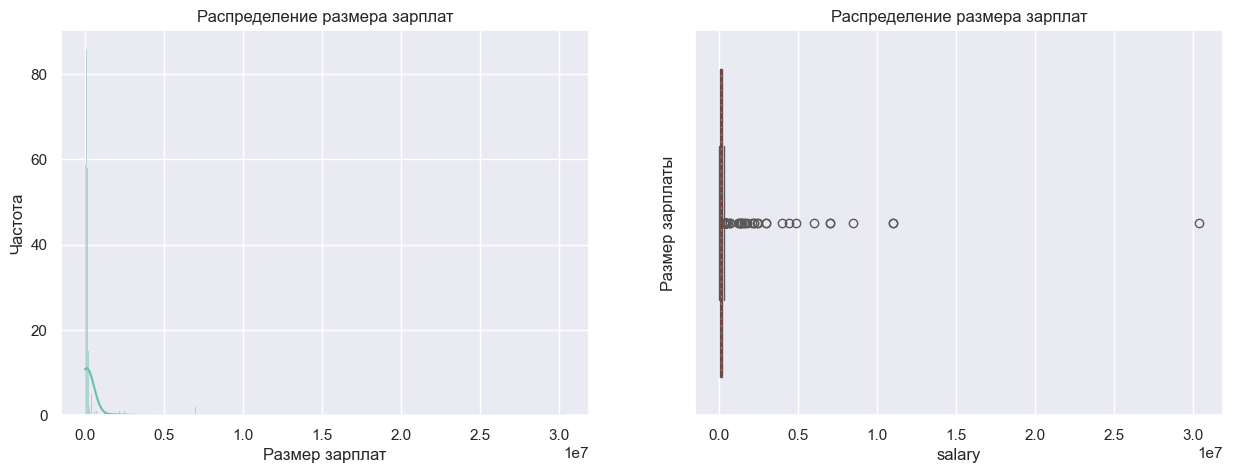

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['salary'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплат', ylabel='Частота')
axes[0].set_title('Распределение размера зарплат')

sns.boxplot(df['salary'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--'})
axes[1].set(ylabel='Размер зарплаты')
axes[1].set_title('Распределение размера зарплат')

plt.show()

In [17]:
data_agg = df.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от уровня опыта')
data_agg

Зарплата в зависимости от уровня опыта


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


## <center> Статистический анализ данных

In [18]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      